In [1]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
 
from keras.datasets import imdb

In [2]:
# IMDB Dataset 
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( 
num_words=10000)

In [3]:
#Vectorizing the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
# Vectorized Labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


In [7]:
# Building our Network
from tensorflow import keras 
from tensorflow.keras import layers 
model = keras.Sequential([ 
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"), 
layers.Dense(1, activation="sigmoid") 
])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
#Validation of our Network
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
tf.random.set_seed(8985)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5356 - accuracy: 0.7731 - val_loss: 0.4366 - val_accuracy: 0.8223
Epoch 2/20
30/30 [==============================] - 2s 68ms/step - loss: 0.3392 - accuracy: 0.8897 - val_loss: 0.3233 - val_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2502 - accuracy: 0.9189 - val_loss: 0.2892 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1992 - accuracy: 0.9353 - val_loss: 0.2781 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1669 - accuracy: 0.9453 - val_loss: 0.3097 - val_accuracy: 0.8757
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1398 - accuracy: 0.9563 - val_loss: 0.2925 - val_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1213 - accuracy: 0.9613 - val_loss: 0.2981 - val_accuracy: 0.8841
Epoch 8/20
30

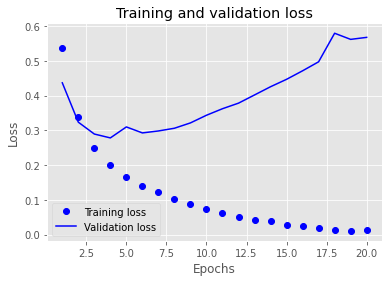

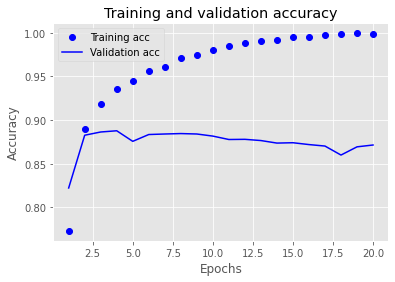

In [9]:
# Plotting the Training/Validation Loss and Training/Validation Accuracy
# Training/Validation Loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Training/Validation Accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
# Retrain the Model
tf.random.set_seed(8985)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4894 - accuracy: 0.8052
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2915 - accuracy: 0.8994
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2259 - accuracy: 0.9188
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2802 - accuracy: 0.8885


In [11]:
results

[0.29513150453567505, 0.8824800252914429]

In [12]:
# Predictions on New Data
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.23484764],
       [0.9993306 ],
       [0.8069219 ],
       ...,
       [0.12256115],
       [0.08786072],
       [0.6967162 ]], dtype=float32)

Question 1: You used two hidden layers. Try using one or three hidden layers and see how doing so 
affects validation and test accuracy. 

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.5663 - accuracy: 0.7693 - val_loss: 0.4668 - val_accuracy: 0.8390
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.3848 - accuracy: 0.8845 - val_loss: 0.3631 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 2s 59ms/step - loss: 0.3004 - accuracy: 0.9094 - val_loss: 0.3172 - val_accuracy: 0.8845
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2507 - accuracy: 0.9215 - val_loss: 0.2942 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2172 - accuracy: 0.9317 - val_loss: 0.2962 - val_accuracy: 0.8806
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1933 - accuracy: 0.9389 - val_loss: 0.2785 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1749 - accuracy: 0.9471 - val_loss: 0.2760 - val_accuracy: 0.8870
Epoch 8/20
30

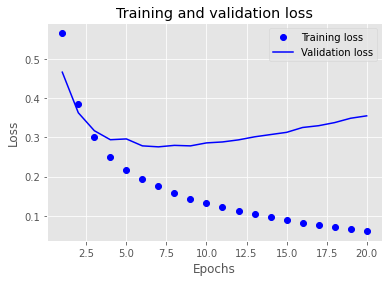

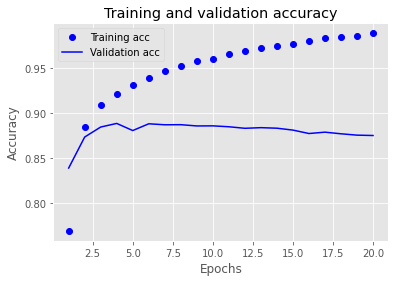

Epoch 1/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1754 - accuracy: 0.9444
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1448 - accuracy: 0.9528
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1279 - accuracy: 0.9599
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3657 - accuracy: 0.8692


In [11]:
# One Hidden Layer
tf.random.set_seed(8985)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.5662 - accuracy: 0.7410 - val_loss: 0.4685 - val_accuracy: 0.7952
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3484 - accuracy: 0.8841 - val_loss: 0.3210 - val_accuracy: 0.8814
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2454 - accuracy: 0.9191 - val_loss: 0.2913 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1980 - accuracy: 0.9335 - val_loss: 0.2758 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1634 - accuracy: 0.9447 - val_loss: 0.3280 - val_accuracy: 0.8711
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1347 - accuracy: 0.9564 - val_loss: 0.3147 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1178 - accuracy: 0.9607 - val_loss: 0.3166 - val_accuracy: 0.8831
Epoch 8/20
30

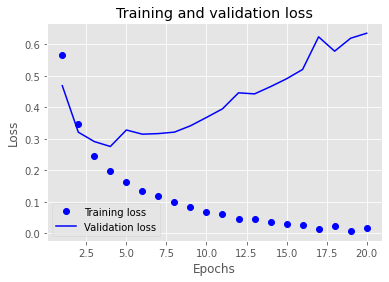

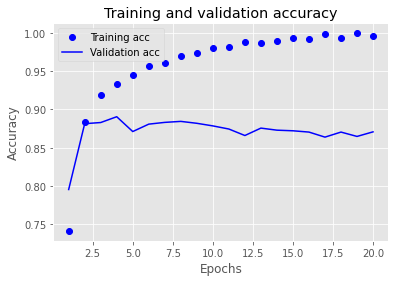

Epoch 1/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2263 - accuracy: 0.9464
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1312 - accuracy: 0.9611
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1037 - accuracy: 0.9698
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.4600 - accuracy: 0.8634


In [12]:
# Three Hidden Layer
tf.random.set_seed(8985)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Question 2: Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so 
on.    

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5040 - accuracy: 0.7678 - val_loss: 0.4520 - val_accuracy: 0.7894
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3005 - accuracy: 0.8901 - val_loss: 0.2945 - val_accuracy: 0.8873
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2215 - accuracy: 0.9235 - val_loss: 0.3204 - val_accuracy: 0.8684
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1796 - accuracy: 0.9379 - val_loss: 0.2829 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1485 - accuracy: 0.9493 - val_loss: 0.3891 - val_accuracy: 0.8535
Epoch 6/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1187 - accuracy: 0.9612 - val_loss: 0.3264 - val_accuracy: 0.8746
Epoch 7/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1116 - accuracy: 0.9605 - val_loss: 0.3172 - val_accuracy: 0.8817
Epoch 8/20
30

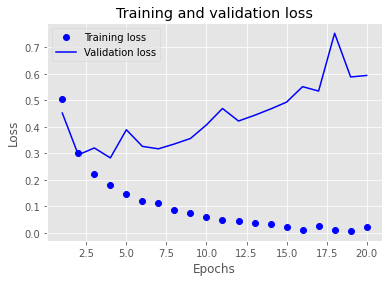

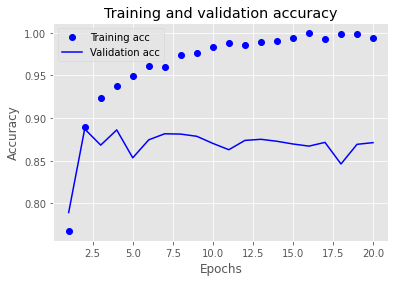

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.1991 - accuracy: 0.9464
Epoch 2/4
49/49 [==============================] - 2s 39ms/step - loss: 0.1179 - accuracy: 0.9628
Epoch 3/4
49/49 [==============================] - 2s 47ms/step - loss: 0.0800 - accuracy: 0.9767
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.4639 - accuracy: 0.8663


In [14]:
# 32 Hidden Layers
tf.random.set_seed(8985)

model = models.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 4s 91ms/step - loss: 0.4987 - accuracy: 0.7798 - val_loss: 0.3919 - val_accuracy: 0.8397
Epoch 2/20
30/30 [==============================] - 2s 69ms/step - loss: 0.3009 - accuracy: 0.8873 - val_loss: 0.2916 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 3s 97ms/step - loss: 0.2211 - accuracy: 0.9182 - val_loss: 0.3324 - val_accuracy: 0.8646
Epoch 4/20
30/30 [==============================] - 2s 68ms/step - loss: 0.1806 - accuracy: 0.9338 - val_loss: 0.3348 - val_accuracy: 0.8680
Epoch 5/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1486 - accuracy: 0.9459 - val_loss: 0.4042 - val_accuracy: 0.8481
Epoch 6/20
30/30 [==============================] - 2s 67ms/step - loss: 0.1250 - accuracy: 0.9565 - val_loss: 0.4111 - val_accuracy: 0.8520
Epoch 7/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1051 - accuracy: 0.9632 - val_loss: 0.3183 - val_accuracy: 0.8845
Epoch 8/20
30

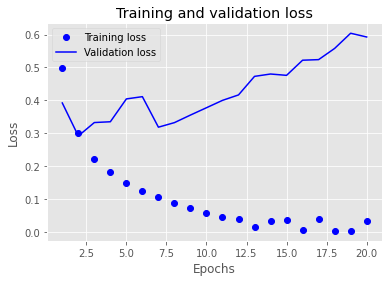

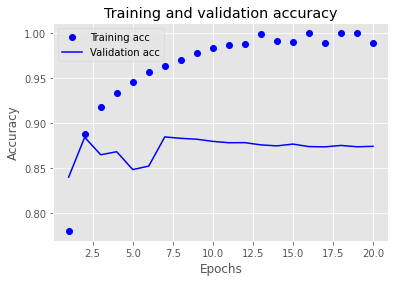

Epoch 1/4
49/49 [==============================] - 2s 47ms/step - loss: 0.1783 - accuracy: 0.9472
Epoch 2/4
49/49 [==============================] - 2s 46ms/step - loss: 0.0988 - accuracy: 0.9691
Epoch 3/4
49/49 [==============================] - 2s 49ms/step - loss: 0.0607 - accuracy: 0.9823
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.4531 - accuracy: 0.8706


In [15]:
# 64 Layers
tf.random.set_seed(8985)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 5s 121ms/step - loss: 0.5166 - accuracy: 0.7473 - val_loss: 0.4554 - val_accuracy: 0.7871
Epoch 2/20
30/30 [==============================] - 3s 93ms/step - loss: 0.3044 - accuracy: 0.8810 - val_loss: 0.2833 - val_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 3s 114ms/step - loss: 0.2272 - accuracy: 0.9133 - val_loss: 0.2857 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 3s 115ms/step - loss: 0.1773 - accuracy: 0.9330 - val_loss: 0.3186 - val_accuracy: 0.8707
Epoch 5/20
30/30 [==============================] - 5s 155ms/step - loss: 0.1488 - accuracy: 0.9439 - val_loss: 0.3252 - val_accuracy: 0.8713
Epoch 6/20
30/30 [==============================] - 3s 114ms/step - loss: 0.1067 - accuracy: 0.9632 - val_loss: 0.5101 - val_accuracy: 0.8255
Epoch 7/20
30/30 [==============================] - 4s 152ms/step - loss: 0.0926 - accuracy: 0.9666 - val_loss: 0.3253 - val_accuracy: 0.8814
Epoch 8

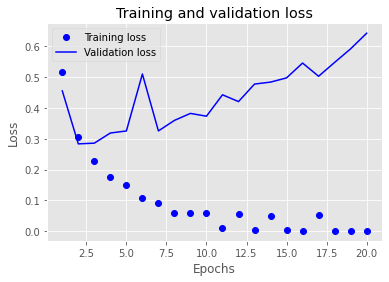

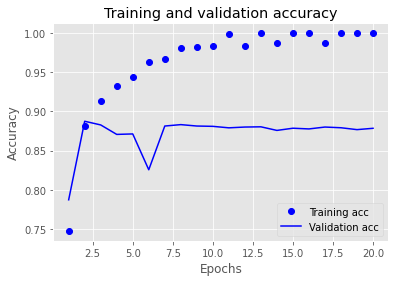

Epoch 1/4
49/49 [==============================] - 5s 96ms/step - loss: 0.1887 - accuracy: 0.9460
Epoch 2/4
49/49 [==============================] - 3s 70ms/step - loss: 0.0854 - accuracy: 0.9739
Epoch 3/4
49/49 [==============================] - 3s 69ms/step - loss: 0.0483 - accuracy: 0.9864
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.4423 - accuracy: 0.8751


In [10]:
# 128 Layers
tf.random.set_seed(8985)

model = models.Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Question 3 : Try using the mse loss function instead of binary_crossentropy. 

Epoch 1/20
30/30 [==============================] - 6s 153ms/step - loss: 0.1955 - accuracy: 0.7587 - val_loss: 0.1529 - val_accuracy: 0.8242
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1170 - accuracy: 0.8776 - val_loss: 0.1071 - val_accuracy: 0.8761
Epoch 3/20
30/30 [==============================] - 2s 50ms/step - loss: 0.0853 - accuracy: 0.9069 - val_loss: 0.0965 - val_accuracy: 0.8767
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0685 - accuracy: 0.9241 - val_loss: 0.0886 - val_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0584 - accuracy: 0.9353 - val_loss: 0.0855 - val_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0503 - accuracy: 0.9467 - val_loss: 0.0879 - val_accuracy: 0.8815
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0437 - accuracy: 0.9547 - val_loss: 0.0877 - val_accuracy: 0.8825
Epoch 8/20
3

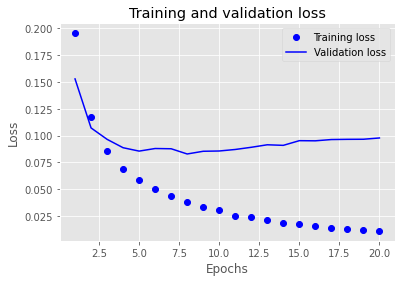

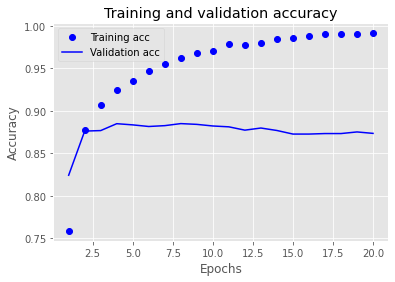

Epoch 1/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0447 - accuracy: 0.9466
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0357 - accuracy: 0.9594
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.0312 - accuracy: 0.9657
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.1027 - accuracy: 0.8704


In [6]:
# MSE Loass Function
tf.random.set_seed(8985)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Question 4 : Try using the tanh activation instead of relu. 

Epoch 1/20
30/30 [==============================] - 4s 62ms/step - loss: 0.5077 - accuracy: 0.7903 - val_loss: 0.4204 - val_accuracy: 0.8273
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3072 - accuracy: 0.8955 - val_loss: 0.3044 - val_accuracy: 0.8804
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2231 - accuracy: 0.9227 - val_loss: 0.2794 - val_accuracy: 0.8853
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1703 - accuracy: 0.9429 - val_loss: 0.2793 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1406 - accuracy: 0.9516 - val_loss: 0.3191 - val_accuracy: 0.8743
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1062 - accuracy: 0.9667 - val_loss: 0.3835 - val_accuracy: 0.8649
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0971 - accuracy: 0.9674 - val_loss: 0.3426 - val_accuracy: 0.8794
Epoch 8/20
30

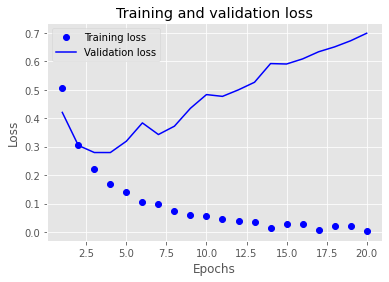

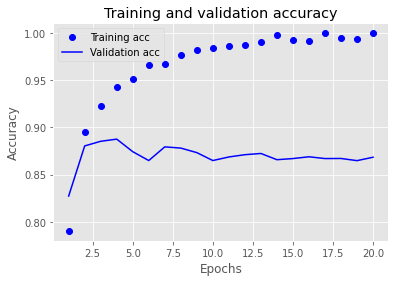

Epoch 1/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2617 - accuracy: 0.9418
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1433 - accuracy: 0.9579
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.1153 - accuracy: 0.9661
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.4720 - accuracy: 0.8601


In [7]:
# Tanh Activation Function
tf.random.set_seed(8985)

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Question 5: Use any technique we studied in class, and these include regularization, dropout, etc., to 
get your model to perform better on validation.   

Epoch 1/20
30/30 [==============================] - 4s 83ms/step - loss: 0.6403 - accuracy: 0.6284 - val_loss: 0.5268 - val_accuracy: 0.8376
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.5236 - accuracy: 0.7583 - val_loss: 0.4263 - val_accuracy: 0.8636
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4431 - accuracy: 0.8153 - val_loss: 0.3546 - val_accuracy: 0.8776
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3853 - accuracy: 0.8483 - val_loss: 0.3131 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3393 - accuracy: 0.8718 - val_loss: 0.2952 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2984 - accuracy: 0.8941 - val_loss: 0.2774 - val_accuracy: 0.8897
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2712 - accuracy: 0.9073 - val_loss: 0.2726 - val_accuracy: 0.8904
Epoch 8/20
30

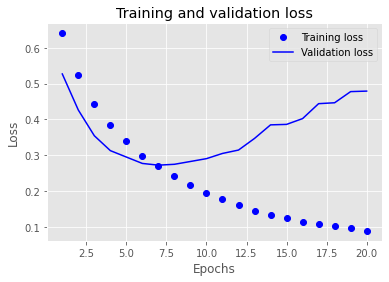

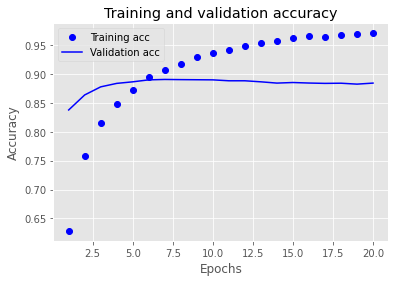

Epoch 1/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2492 - accuracy: 0.9246
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2085 - accuracy: 0.9355
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1898 - accuracy: 0.9419
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.4179 - accuracy: 0.8774


In [8]:
# Dropout Technique
tf.random.set_seed(8985)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/20
30/30 [==============================] - 4s 78ms/step - loss: 0.5586 - accuracy: 0.7835 - val_loss: 0.4412 - val_accuracy: 0.8549
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3588 - accuracy: 0.8970 - val_loss: 0.3586 - val_accuracy: 0.8803
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2896 - accuracy: 0.9179 - val_loss: 0.3396 - val_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2504 - accuracy: 0.9347 - val_loss: 0.3267 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2265 - accuracy: 0.9419 - val_loss: 0.3294 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2077 - accuracy: 0.9487 - val_loss: 0.3339 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1957 - accuracy: 0.9528 - val_loss: 0.3403 - val_accuracy: 0.8847
Epoch 8/20
30

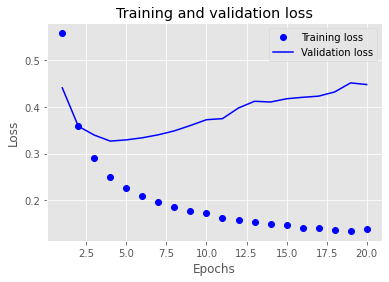

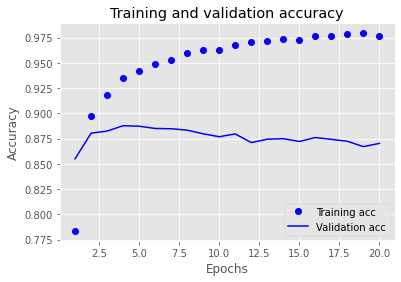

Epoch 1/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2516 - accuracy: 0.9373
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2098 - accuracy: 0.9457
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1984 - accuracy: 0.9481
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.4162 - accuracy: 0.8675


In [9]:
# Regularization Technique
from keras import regularizers

tf.random.set_seed(1234)

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)